In [1]:
import pandas as pd

Location = 'NYC Accidents 2020.csv'
df1 = pd.read_csv(Location,index_col='COLLISION_ID')
df1



,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
4342908,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4343555,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
4343142,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,Backing Unsafely,NaN,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4343588,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4342953,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268088,2020-01-01,15:13:00,BRONX,10459.0,40.826810,-73.896510,POINT (-73.89651 40.82681),NaN,NaN,1122 INTERVALE AVENUE,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4267756,2020-01-01,08:00:00,BROOKLYN,11235.0,40.582935,-73.959210,POINT (-73.95921 40.582935),NaN,NaN,3401 GUIDER AVENUE,...,Passing Too Closely,Unspecified,Unspecified,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
4269230,2020-01-01,11:36:00,BRONX,10461.0,40.848553,-73.830055,POINT (-73.830055 40.848553),NaN,NaN,1810 MAHAN AVENUE,...,Unspecified,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN


In [32]:
df2 = df1[['BOROUGH','CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']]
df2['NUMBER_OF_ACCIDENTS'] = 1
df2

<ipython-input-32-d16e7228e115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NUMBER_OF_ACCIDENTS'] = 1


,BOROUGH,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER_OF_ACCIDENTS
COLLISION_ID,,,,,
4342908,BRONX,2020-08-29,0,0,1
4343555,BROOKLYN,2020-08-29,2,0,1
4343142,NaN,2020-08-29,1,0,1
4343588,BRONX,2020-08-29,0,0,1
4342953,BROOKLYN,2020-08-29,0,0,1
...,...,...,...,...,...
4268088,BRONX,2020-01-01,0,0,1
4267756,BROOKLYN,2020-01-01,0,0,1
4269230,BRONX,2020-01-01,0,0,1


In [33]:
df3 = df2.reset_index().groupby('BOROUGH').sum()
del df3['COLLISION_ID']
df3

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER_OF_ACCIDENTS
BOROUGH,,,
BRONX,3232,10,9417
BROOKLYN,6024,27,16907
MANHATTAN,2151,9,7353
QUEENS,4600,20,14017
STATEN ISLAND,610,6,1446


<AxesSubplot:xlabel='BOROUGH'>

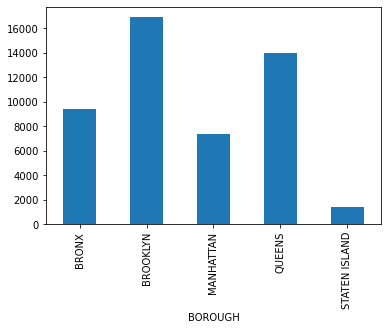

In [36]:
df3['NUMBER_OF_ACCIDENTS'].plot.bar()

In [57]:
df4 = df2.reset_index().groupby('CRASH DATE').sum()
del df4['COLLISION_ID']
#df4['DATE'] = df4.index
df4

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER_OF_ACCIDENTS
CRASH DATE,,,
2020-01-01,111,1,336
2020-01-02,131,0,409
2020-01-03,138,1,452
2020-01-04,126,1,347
2020-01-05,88,0,286
...,...,...,...
2020-08-25,131,0,264
2020-08-26,120,0,280
2020-08-27,149,1,281


In [61]:
df4['MONTH'] = pd.DatetimeIndex(df4.index).month
df4

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER_OF_ACCIDENTS,MONTH
CRASH DATE,,,,
2020-01-01,111,1,336,1
2020-01-02,131,0,409,1
2020-01-03,138,1,452,1
2020-01-04,126,1,347,1
2020-01-05,88,0,286,1
...,...,...,...,...
2020-08-25,131,0,264,8
2020-08-26,120,0,280,8
2020-08-27,149,1,281,8


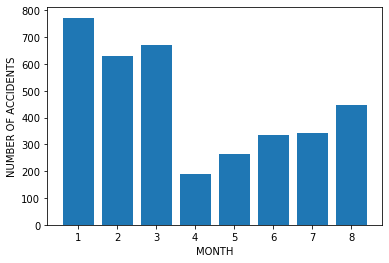

In [63]:
import matplotlib.pyplot as plt
plt.bar(df4['MONTH'],df4['NUMBER_OF_ACCIDENTS'])
plt.xlabel('MONTH')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.show()

In [90]:
df5 = df1[['BOROUGH','CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','VEHICLE TYPE CODE 1']]
df5['NUMBER_OF_ACCIDENTS'] = 1
df5

<ipython-input-90-98db3aa5d952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['NUMBER_OF_ACCIDENTS'] = 1


,BOROUGH,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,NUMBER_OF_ACCIDENTS
COLLISION_ID,,,,,,
4342908,BRONX,2020-08-29,0,0,Sedan,1
4343555,BROOKLYN,2020-08-29,2,0,Sedan,1
4343142,NaN,2020-08-29,1,0,Station Wagon/Sport Utility Vehicle,1
4343588,BRONX,2020-08-29,0,0,Station Wagon/Sport Utility Vehicle,1
4342953,BROOKLYN,2020-08-29,0,0,Sedan,1
...,...,...,...,...,...,...
4268088,BRONX,2020-01-01,0,0,Sedan,1
4267756,BROOKLYN,2020-01-01,0,0,Station Wagon/Sport Utility Vehicle,1
4269230,BRONX,2020-01-01,0,0,Sedan,1


In [91]:
df6 = df5.reset_index().groupby('VEHICLE TYPE CODE 1').sum()
del df6['COLLISION_ID']
#df4['DATE'] = df4.index
df6


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER_OF_ACCIDENTS
VEHICLE TYPE CODE 1,,,
0,0,0,1
18 WHEELER,0,0,1
1C,0,0,1
2 dr sedan,6,0,12
3-Door,2,0,12
...,...,...,...
trailer,1,0,1
truck,0,0,2
usps,0,0,1


<AxesSubplot:xlabel='VEHICLE TYPE CODE 1'>

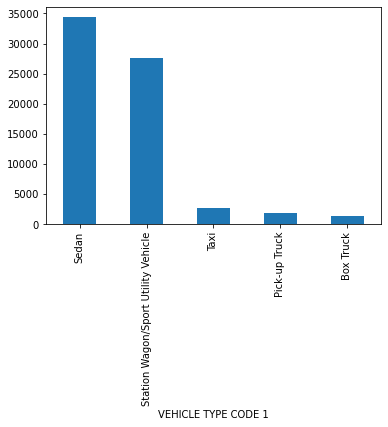

In [98]:
Sorted = df6.sort_values(['NUMBER_OF_ACCIDENTS'], ascending = False)
Sorted['NUMBER_OF_ACCIDENTS'].head().plot.bar()